## Задача

- [x] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [x] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [x] При обучении использовать **подбор гиперпараметров**.
- [x] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [x] (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [x] (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pathlib

%matplotlib inline
%precision %.4f
warnings.filterwarnings('ignore') 

# Язык жестов (цифры)
**Ссылка**: https://www.kaggle.com/datasets/rayeed045/bangla-sign-language-dataset

**Описание датасета**:
This is a Bangla Sign Language Dataset, using MediaPipe framework, which accurately detects the hand & 21 hand key-points from a raw RGB image, and stores the co-ordinate values of these key-points. After collecting 47000 such raw image files for 47 signs (100 files per sign per user) and generating 47000 corresponding output image files applying MediaPipe, the co-ordinate values of these key-points are stored in a .csv files. This dataset contains 470 such .csv files (collected from 10 users for 47 signs in total). After generating the dataset, we have also done the classification, using different classifiers, such as KNN, SVM, RFC, DTC, Neural Networks etc. Accuracies for different classifiers are yielded in the classification code (in code section).

In [2]:
import os
data = []
for dirname, _, filenames in os.walk('Sign Digits - CSV Files'):
    for filename in filenames:
        path_to_csv = os.path.join(dirname, filename)
        data.append(pd.read_csv(path_to_csv))
data = pd.concat(data)

In [3]:
data.describe()

,x00,y00,z00,x01,y01,z01,x02,y02,z02,x03,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.490015,0.709218,-0.000114,0.488206,0.668160,-0.033892,0.485996,0.590081,-0.057284,0.493946,...,0.520859,0.494064,-0.073016,0.517589,0.498028,-0.073554,0.513699,0.501652,-0.069120,4.500000
std,0.075338,0.129355,0.000081,0.096622,0.096853,0.067246,0.124166,0.085587,0.097081,0.135152,...,0.149809,0.109089,0.123525,0.137643,0.125347,0.143846,0.134416,0.151209,0.145614,2.872425
min,0.103749,0.210041,-0.000555,0.203981,0.187733,-0.306116,0.115049,0.148284,-0.438742,0.064852,...,0.048905,0.137994,-0.559074,0.086052,0.154156,-0.522153,0.015740,0.112211,-0.484644,0.000000
25%,0.451386,0.673711,-0.000154,0.417144,0.616255,-0.084535,0.389423,0.550042,-0.126214,0.398634,...,0.381174,0.437528,-0.151892,0.395072,0.404269,-0.173982,0.407218,0.363149,-0.173036,2.000000
50%,0.492796,0.738344,-0.000106,0.475409,0.683317,-0.034772,0.480497,0.601386,-0.055690,0.496867,...,0.561938,0.492732,-0.074352,0.537243,0.504726,-0.086575,0.523854,0.535077,-0.088931,4.500000
75%,0.529233,0.787369,-0.000061,0.564348,0.735450,0.018428,0.588462,0.645764,0.014354,0.588867,...,0.642736,0.548812,0.000369,0.624735,0.586134,0.024301,0.609644,0.622753,0.033796,7.000000
max,0.835258,0.982309,0.000193,0.853214,0.897055,0.206226,0.878699,0.820996,0.325872,0.945177,...,0.907419,0.864294,0.549936,0.893017,0.845953,0.559182,0.964103,0.837568,0.536063,9.000000


In [4]:
data.shape

(10000, 65)

# EDA
Проверим датасет на наличие дубликатов и нулей

In [5]:
data.isnull().sum()

Single Image Frame    0
x00                   0
y00                   0
z00                   0
x01                   0
                     ..
z19                   0
x20                   0
y20                   0
z20                   0
Label                 0
Length: 65, dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

# PCA/t-SNE
Визуализируем датасет снизив кол-во признаков до 2

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

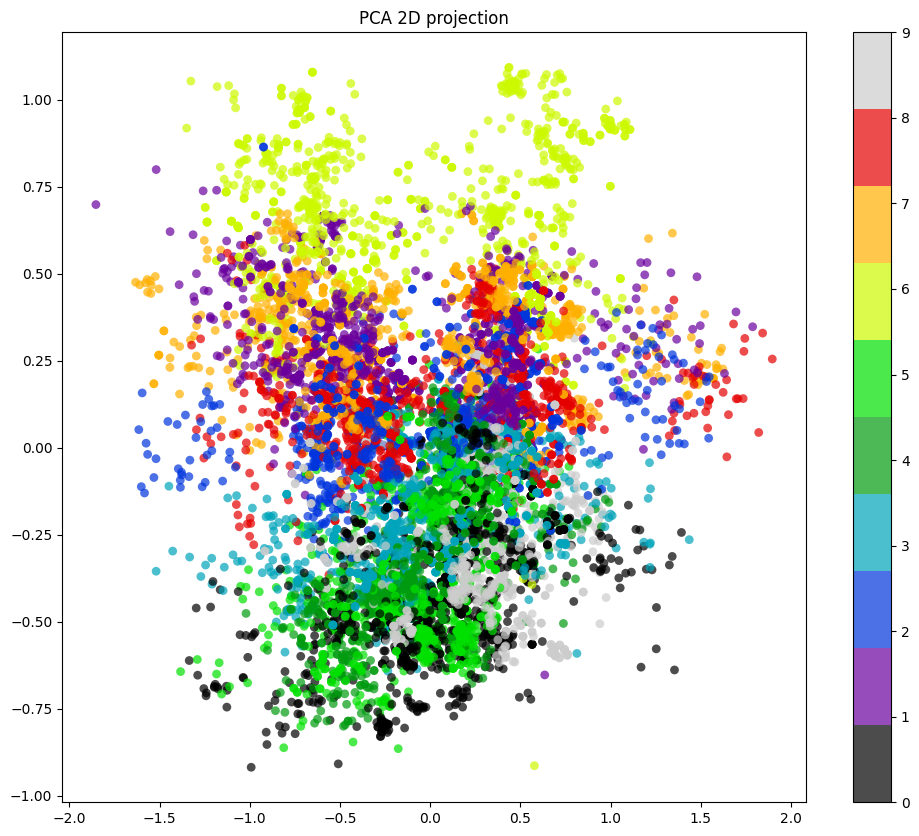

In [9]:
plt.figure(figsize=(12, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA 2D projection');

Смотря на проекцию с помощью PCA можно заметить, что точки из одних групп кластеризуются, однако в совокопнусти точки разных групп сильно перемешаны.

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)

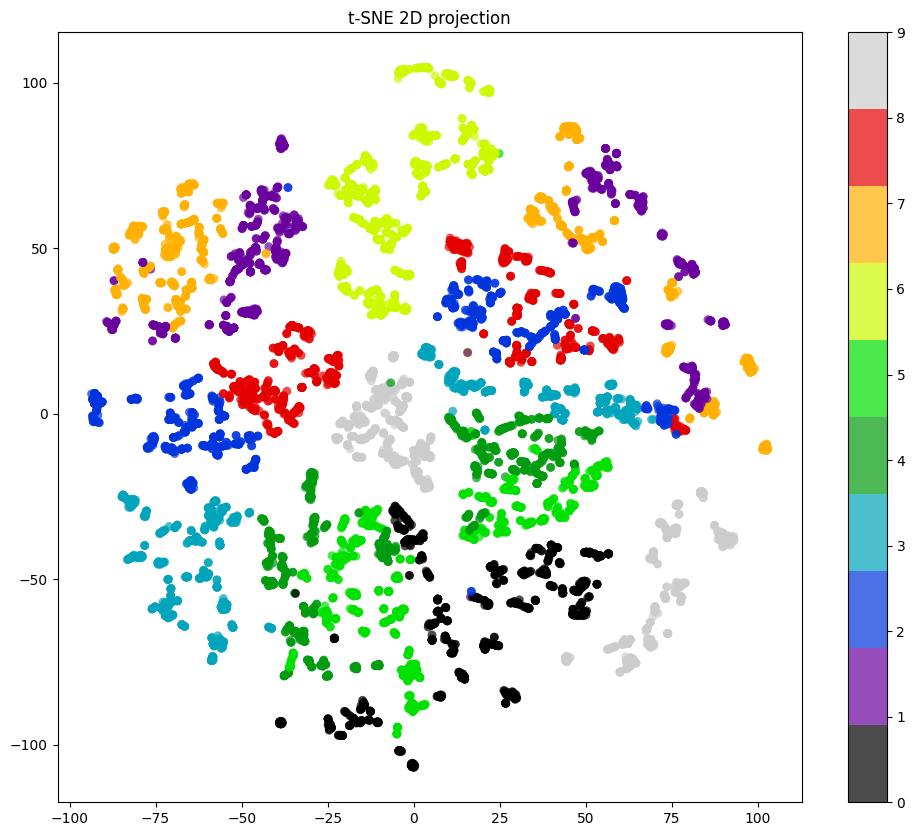

In [11]:
plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("t-SNE 2D projection");

В случае t-SNE всё заметно лучше, точки выделяются в гораздо более явные кластеры, однако и данный метод занимает гораздо больше времени

Зададим пороговое значение дисперсии для выбора количества компонент

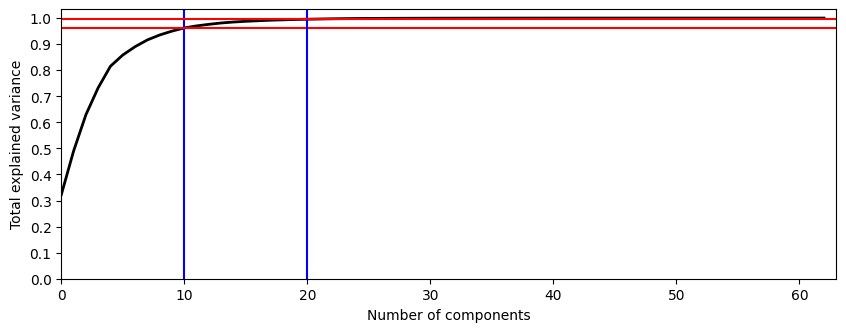

In [12]:
pca = PCA().fit(X)

plt.figure(figsize=(10,3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(10, c='b')
plt.axhline(0.96, c='r')
plt.axvline(20, c='b')
plt.axhline(0.995, c='r')
plt.show();

Как видно из графика, 10 компонент описывают около 99% дисперссии, 10 компонент - около 96%.
Выбирая кол-во компонент меньше 10, мы сильно потеряем в описываемой дисперсии, выбирая выше 20, получим обратную ситуацию. 

# Информация о системе

In [13]:
!echo "-- CPU --"
!lscpu | grep name
!echo "-- RAM --"
!free -g -h -t | grep Mem | cut -c1-23
!echo "-- OS --"
!uname --kernel-release
!echo "-- Python --"
!python --version

-- CPU --
Model name:                      Intel(R) Core(TM) i5-10600KF CPU @ 4.10GHz
-- RAM --
Mem:            15Gi   
-- OS --
5.4.236-1-MANJARO
-- Python --
Python 3.10.9


# Реализация K-means

In [14]:
import numpy.typing as npt
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted


class MyKMeans(BaseEstimator, ClusterMixin):


    def __init__(self, n_clusters=10, *, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state

    def _get_labels(self, x: npt.NDArray) -> npt.NDArray:
        dists_to_center = np.linalg.norm(x[..., None] - self.cluster_centers_.T, axis=1)
        return np.argmin(dists_to_center, axis=1)

    def fit(self, x: npt.ArrayLike, y=None) -> "MyKMeans":
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.random_state_ = check_random_state(self.random_state)
        x = check_array(x)

        self.n_features_in_ = x.shape[1]
        self.cluster_centers_ = x[self.random_state_.choice(len(x), size=self.n_clusters, replace=False), :]

        max_shift = np.inf
        while max_shift > self.tol:
            self.labels_ = self._get_labels(x)
            new_centers = np.empty((self.n_clusters, self.n_features_in_))
            for label in np.unique(self.labels_):
                new_centers[label] = np.mean(x[self.labels_ == label], axis=0)

            max_shift = np.max(np.linalg.norm(self.cluster_centers_ - new_centers, axis=1))
            self.cluster_centers_ = new_centers

        return self

    def predict(self, x: npt.ArrayLike) -> npt.NDArray:
        check_is_fitted(self)
        x = check_array(x)
        return self._get_labels(x)

# Обучение

Как было сказано ранее, будем использовать для обучения 10, 20 и все компоненты.

In [15]:
Xs = {
    "10": PCA(n_components=10).fit_transform(X),
    "20": PCA(n_components=20).fit_transform(X),
    "60": X
}

Поскольку известны правильные ответы, в качестве метрик будут использоваться:
- Adjusted Rand Index
- Adjusted Mutual Information
- Fowlkes-Mallows Index

Гиперпараметры будут подбираться для каждой метрики поотдельности

In [16]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score

metrics = {
    "ari": adjusted_rand_score,
    "ami": adjusted_mutual_info_score,
    "fmi": fowlkes_mallows_score
}

In [19]:
import pathlib
import itertools
import time
from sklearn.base import clone


RESULTS_PATH = pathlib.Path("results.csv")

def fit(estimator, x, metric_name: str, param_grid = None):
    param_grid = param_grid if param_grid is not None else {}
    param_combs = [
        dict(params) for params in
        itertools.product(
            *([(name, v) for v in vs] for (name, vs) in param_grid.items())
        )
    ]
    
    result = {
        "best_value": None,
        "fit_predict_time": None,
        "params": None
    }

    metric = metrics[metric_name]

    i = 0

    for params in param_combs:
        cloned_estimator = clone(estimator).set_params(**params)

        start_t = time.perf_counter()
        pred = cloned_estimator.fit_predict(x)
        fit_predict_time_s = (time.perf_counter() - start_t)

        metric_value = metric(y, pred)

        if result["best_value"] is None or metric_value > result["best_value"]:
            result = {
                "best_value": metric_value,
                "fit_predict_time": fit_predict_time_s,
                "params": params,
            }

        print(f"\nResult on {i}: {metric_value}\nBest: {result['best_value']}")
        i += 1
    return result


def add_to_comparsion(estimator_name, estimator, param_grid = None):
    results = []
    for count in Xs.keys():
        for metric_name in metrics.keys():
            print(f"\n\n---------------Start fitting---------------")
            print(f"Estimator: {estimator_name}\nMetric: {metric_name}\nComponents:{count}\n\n")
            result = fit(estimator, Xs[count], metric_name, param_grid)
            results.append({
                "estimator_name": estimator_name,
                "metric_name": metric_name,
                "metric_value": result["best_value"],
                "fit_predict_time": result["fit_predict_time"],
                "components_count": count
            })
    pd.DataFrame(results).to_csv(RESULTS_PATH, mode="a", header=not RESULTS_PATH.exists())


def show_comparsion(metric):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 10))

    data = pd.read_csv(RESULTS_PATH)
    data = data[data.metric_name == metric]
    sns.barplot(data, x="components_count", y="metric_value", hue="estimator_name", ax=axs[0])
    sns.barplot(data, x="components_count", y="fit_predict_time", hue="estimator_name", ax=axs[1])
    fig.tight_layout()

In [20]:
add_to_comparsion(
    "My KMeans",
    MyKMeans(n_clusters=10, random_state=42)
)



---------------Start fitting---------------
Estimator: My KMeans
Metric: ari
Components:10



Result on 0: 0.21748427459164066
Best: 0.21748427459164066


---------------Start fitting---------------
Estimator: My KMeans
Metric: ami
Components:10



Result on 0: 0.452029053784869
Best: 0.452029053784869


---------------Start fitting---------------
Estimator: My KMeans
Metric: fmi
Components:10



Result on 0: 0.314082876414625
Best: 0.314082876414625


---------------Start fitting---------------
Estimator: My KMeans
Metric: ari
Components:20



Result on 0: 0.21912330723972465
Best: 0.21912330723972465


---------------Start fitting---------------
Estimator: My KMeans
Metric: ami
Components:20



Result on 0: 0.45581426616624454
Best: 0.45581426616624454


---------------Start fitting---------------
Estimator: My KMeans
Metric: fmi
Components:20



Result on 0: 0.31586480263124067
Best: 0.31586480263124067


---------------Start fitting---------------
Estimator: My KMeans
Metric: ari

In [21]:
from sklearn.cluster import KMeans

add_to_comparsion(
    "Sklearn KMeans",
    KMeans(n_clusters=10, n_init="auto", random_state=42),
    param_grid={
        "algorithm": ["lloyd", "elkan"],
    }
)



---------------Start fitting---------------
Estimator: Sklearn KMeans
Metric: ari
Components:10



Result on 0: 0.24246244308816284
Best: 0.24246244308816284

Result on 1: 0.24246244308816284
Best: 0.24246244308816284


---------------Start fitting---------------
Estimator: Sklearn KMeans
Metric: ami
Components:10



Result on 0: 0.46405182964600866
Best: 0.46405182964600866

Result on 1: 0.46405182964600866
Best: 0.46405182964600866


---------------Start fitting---------------
Estimator: Sklearn KMeans
Metric: fmi
Components:10



Result on 0: 0.3326692690126576
Best: 0.3326692690126576

Result on 1: 0.3326692690126576
Best: 0.3326692690126576


---------------Start fitting---------------
Estimator: Sklearn KMeans
Metric: ari
Components:20



Result on 0: 0.24001196748682285
Best: 0.24001196748682285

Result on 1: 0.24001196748682285
Best: 0.24001196748682285


---------------Start fitting---------------
Estimator: Sklearn KMeans
Metric: ami
Components:20



Result on 0: 0.45675986

In [22]:
from sklearn.cluster import DBSCAN

add_to_comparsion(
    "DBSCAN",
    DBSCAN(n_jobs=-1),
    param_grid={
        # Расстояние до соседей
        "eps": [0.5, 1, 2, 4, 8],
        # Уровень шума
        "min_samples": [5, 25, 125, 250],
    }
)



---------------Start fitting---------------
Estimator: DBSCAN
Metric: ari
Components:10



Result on 0: 0.024008989784388306
Best: 0.024008989784388306

Result on 1: 0.02791621078711631
Best: 0.02791621078711631

Result on 2: 0.05313502277744438
Best: 0.05313502277744438

Result on 3: 0.08392567553025136
Best: 0.08392567553025136

Result on 4: 0.0
Best: 0.08392567553025136

Result on 5: 0.0
Best: 0.08392567553025136

Result on 6: 0.0
Best: 0.08392567553025136

Result on 7: 0.0
Best: 0.08392567553025136

Result on 8: 0.0
Best: 0.08392567553025136

Result on 9: 0.0
Best: 0.08392567553025136

Result on 10: 0.0
Best: 0.08392567553025136

Result on 11: 0.0
Best: 0.08392567553025136

Result on 12: 0.0
Best: 0.08392567553025136

Result on 13: 0.0
Best: 0.08392567553025136

Result on 14: 0.0
Best: 0.08392567553025136

Result on 15: 0.0
Best: 0.08392567553025136

Result on 16: 0.0
Best: 0.08392567553025136

Result on 17: 0.0
Best: 0.08392567553025136

Result on 18: 0.0
Best: 0.083925675530251


Result on 2: 0.28907755692891424
Best: 0.34830485488360424

Result on 3: 0.20468937138868
Best: 0.34830485488360424

Result on 4: 0.00010840190635345791
Best: 0.34830485488360424

Result on 5: 0.00010840190635345791
Best: 0.34830485488360424

Result on 6: 0.00010840190635345791
Best: 0.34830485488360424

Result on 7: 0.00010840190635345791
Best: 0.34830485488360424

Result on 8: 0.0
Best: 0.34830485488360424

Result on 9: 0.0
Best: 0.34830485488360424

Result on 10: 0.0
Best: 0.34830485488360424

Result on 11: 0.0
Best: 0.34830485488360424

Result on 12: 0.0
Best: 0.34830485488360424

Result on 13: 0.0
Best: 0.34830485488360424

Result on 14: 0.0
Best: 0.34830485488360424

Result on 15: 0.0
Best: 0.34830485488360424

Result on 16: 0.0
Best: 0.34830485488360424

Result on 17: 0.0
Best: 0.34830485488360424

Result on 18: 0.0
Best: 0.34830485488360424

Result on 19: 0.0
Best: 0.34830485488360424


---------------Start fitting---------------
Estimator: DBSCAN
Metric: fmi
Components:60





# Сравнение

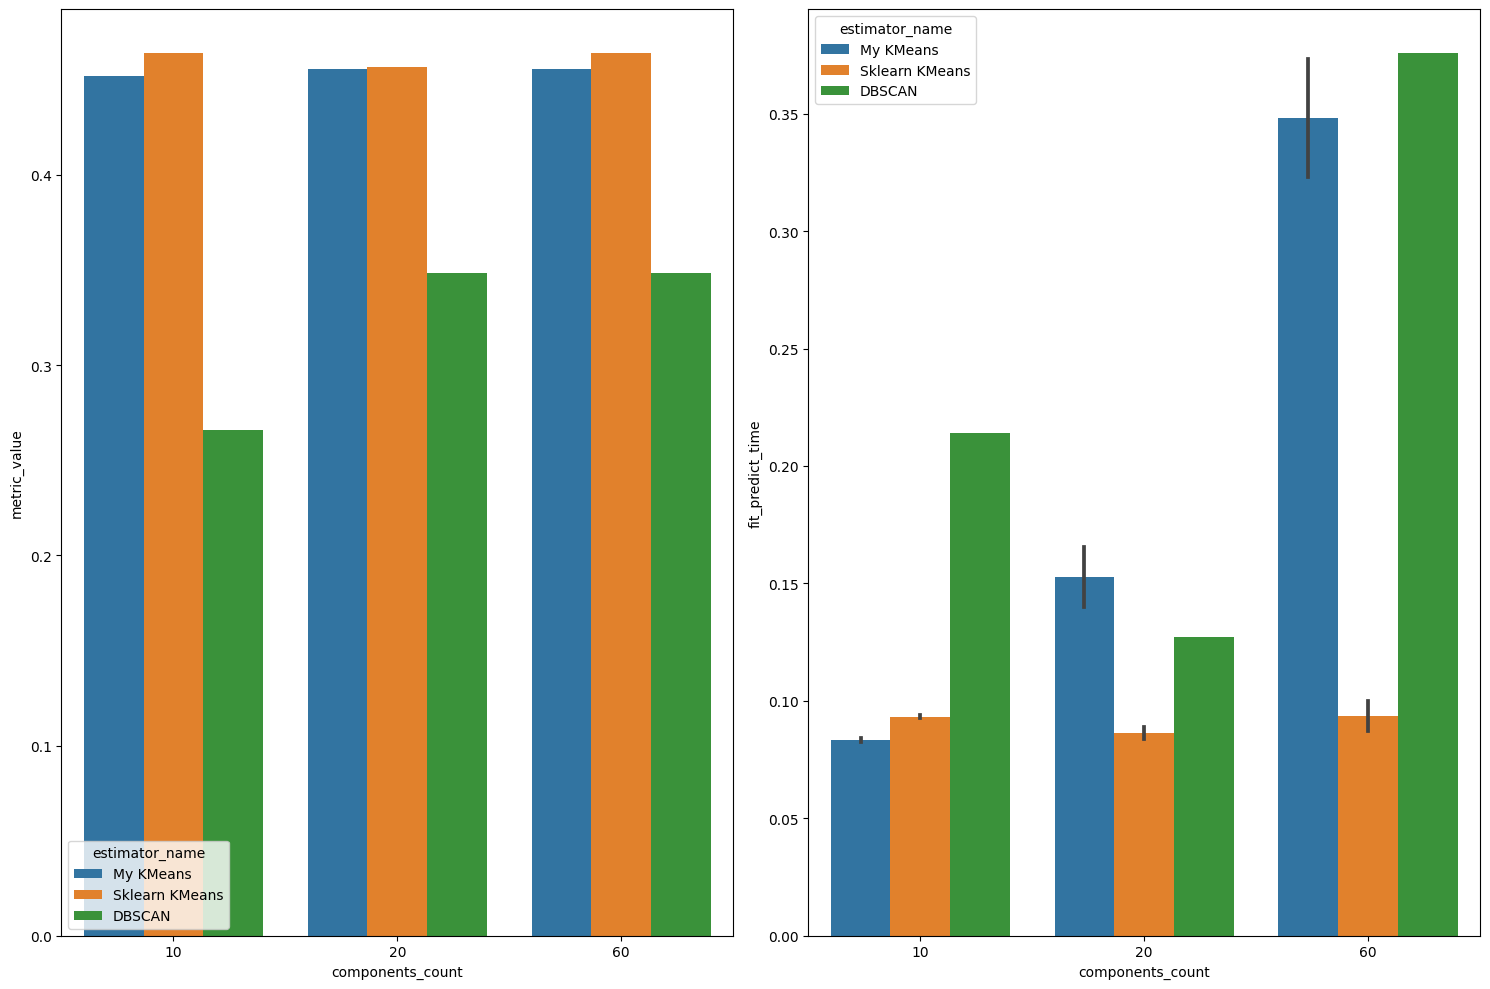

In [23]:
show_comparsion("ami")

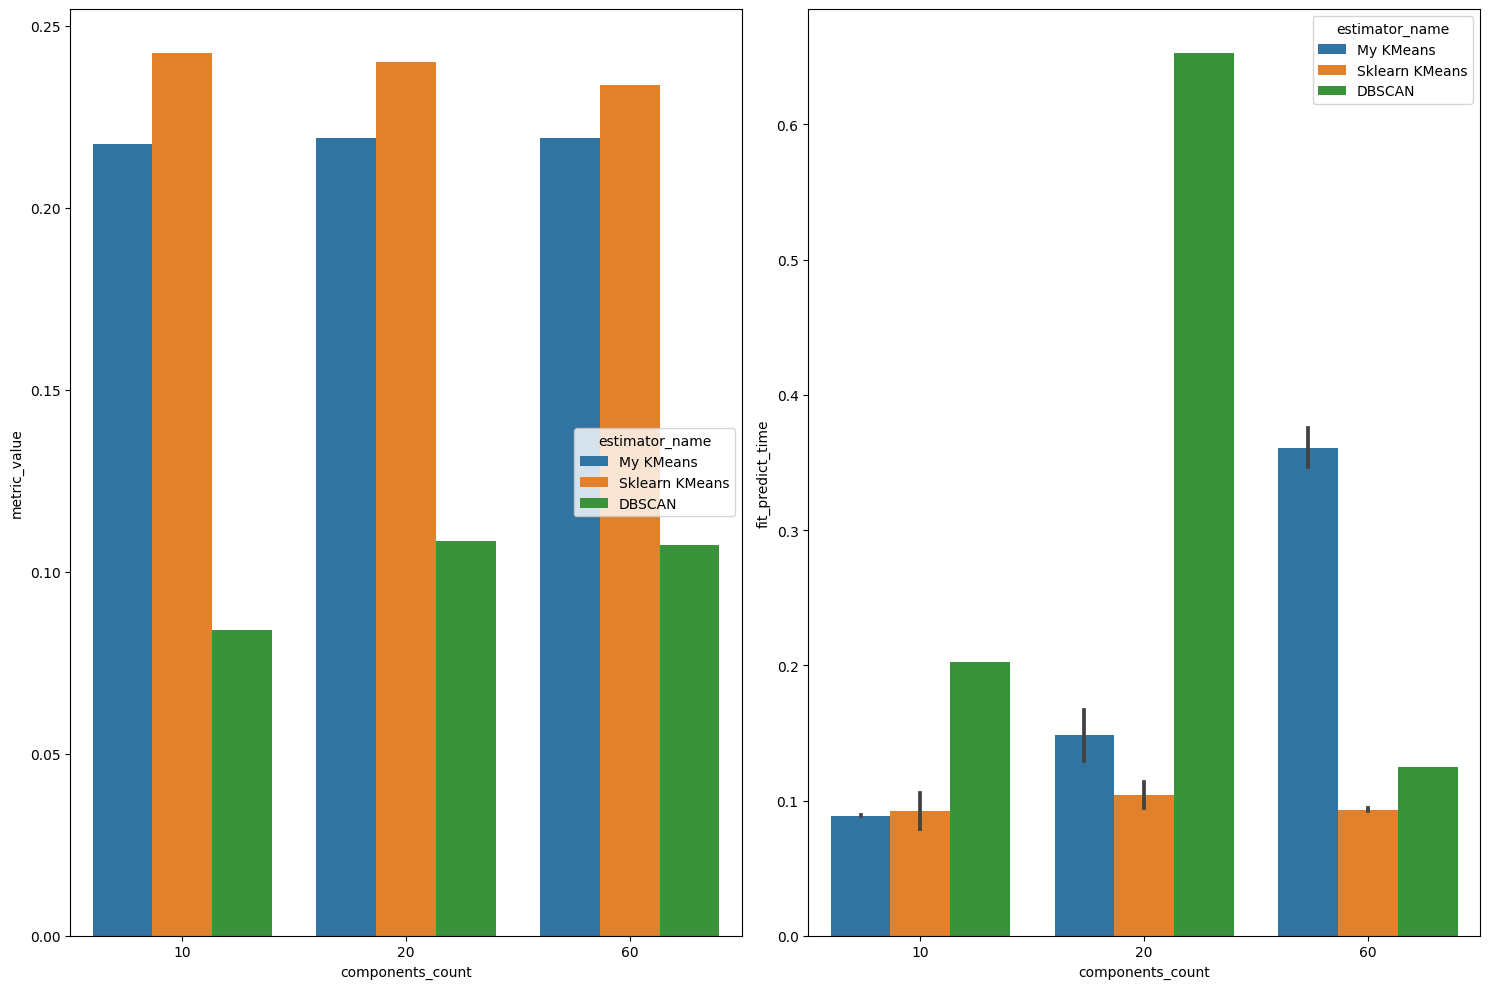

In [24]:
show_comparsion("ari")

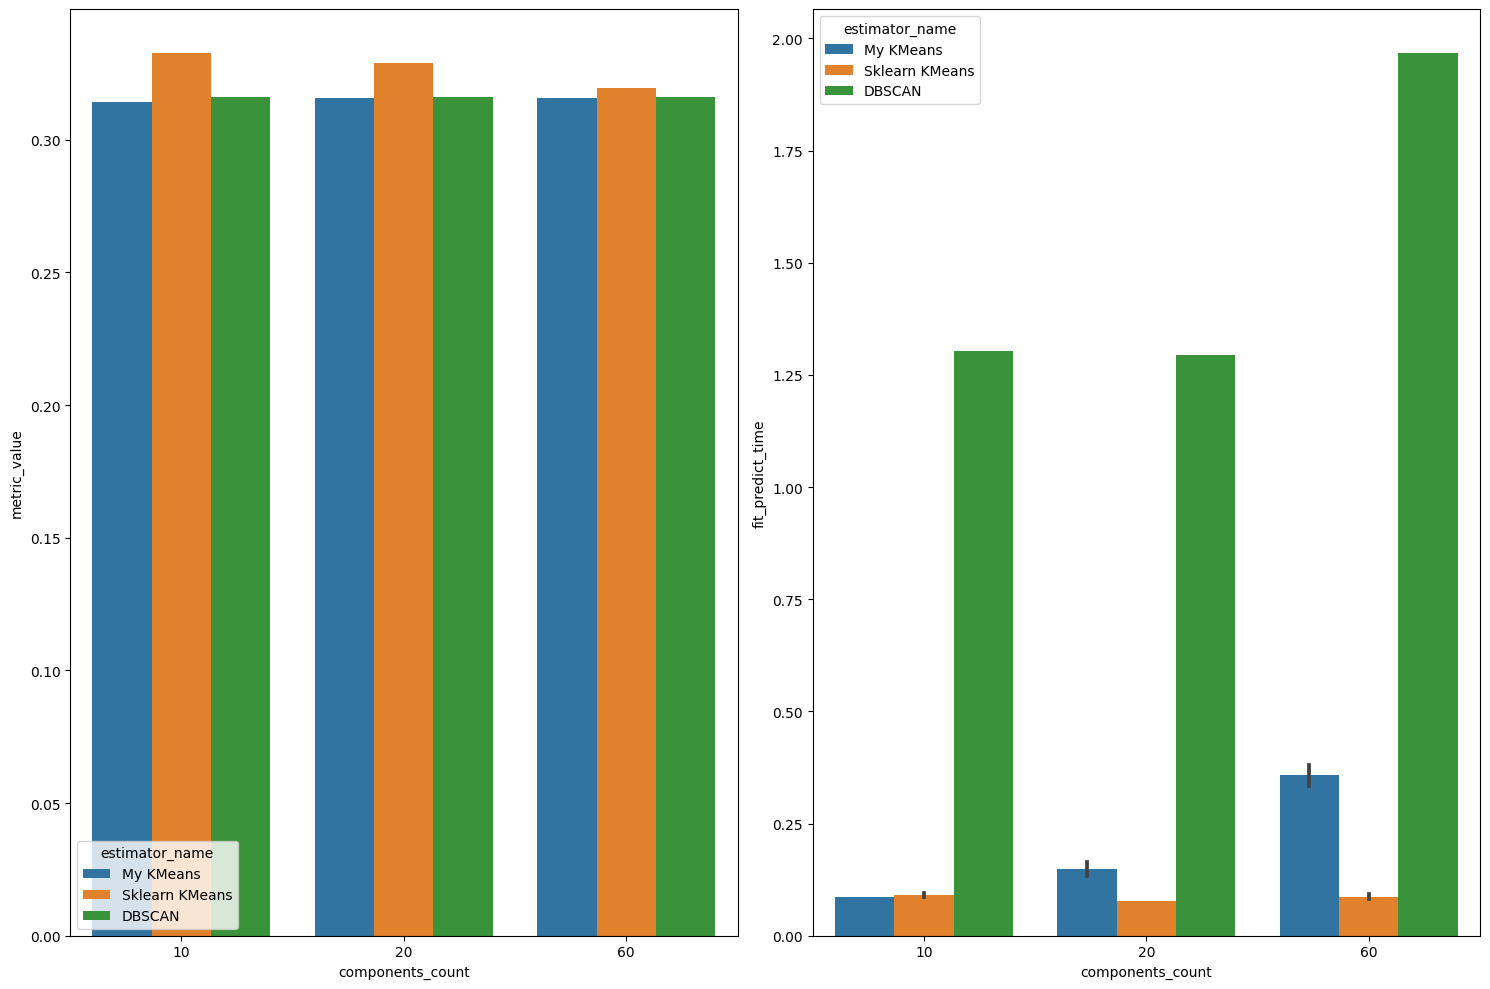

In [25]:
show_comparsion("fmi")

Таким образом
- При уменьшении количества атрибутов время обучения ожидаемо значительно уменьшается
- Метрики качетва при уменьшении количества атрибутов у KMeans практически не изменились
- По всем метрикам KMeans превосходит DBSCAN
- Данные модели показали достаточно низкие результаты